### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Sai Yasaswi Kodali(2024ac05098)
2. R Rajani(2024ac05242)
3. Palmur Bipin Narsappa(2024AC05967)
4. NEERADI CHANDRA SAGAR(2024ac05001)
5. Chinmay Ram Rangisetty(2024ac05818)


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`


Remarks: ##Add here

# Background

A large e-commerce organization operates a homepage recommendation slot that displays one product to each visiting user. The company aims to maximize long-term net profit from these recommendations.

You are provided with a dataset of **498 user sessions**, each representing how a particular user would respond to each of six products.

Link for accessing dataset:
https://drive.google.com/file/d/14yDuW-zFs9-fh6ySH9xmULFcZuKVhn1r/view?usp=sharing


The dataset structure is:

*UserID, Product1, cost1, Product2, cost2, … , Product6, cost6*


Each row corresponds to one user and contains the following information.

## Product X column
The value under **Product X** represents the actual revenue the system would earn from that specific user if Product X were shown.

Revenue varies across users because:

- different users purchase different quantities  
- some users click while others ignore  
- some users spend more  
- some users purchase premium items or bundles  

Thus, actual revenue is **user-dependent**, not product-dependent.  
The same product may generate high revenue from one user and very low revenue from another.

## Cost X column
The value under **cost X** represents the personalized promotional cost incurred to show Product X to that user. This may include:

- dynamic advertisement bidding cost (CPC)  
- discounts or coupon values offered  
- targeted promotion cost  
- personalization overhead  

Costs differ across users because:

- some users require higher incentive levels  
- some are expensive to target via ads  
- some convert easily with minimal cost  

Thus, cost is also **user-dependent** and varies per session.



# Environment Dynamics

## Arms
In the Multi-Armed Bandit formulation:

There are **6 arms**:
A = {1, 2, 3, 4, 5, 6}

Arm X corresponds to recommending **Product X**.

## Reward
For each product X and each user session i:

$
\text{NetReward}_{i,X} = \text{Product}_{i,X} - \text{Cost}_{i,X}
$

This net reward represents the **profit** gained from showing product X to user i.  
This is the metric the organization aims to maximize.


# Current Organizational Policy

The organization currently follows a **random recommendation policy**:

“For each user visit, randomly select one of the six products and display it.”

This strategy:

- does not learn from previous outcomes  
- does not identify which products consistently deliver higher profit  
- wastes impressions on low-value products  
- provides unstable and suboptimal profit performance  

Management asks you to investigate:

- Whether a learning-based approach can yield better decisions  
- Which products are actually profitable when user variability is considered  
- How alternative strategies compare to the random policy  



# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario.

### Initialize constants

In [1]:

# Initialize Constants
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Design a Product Environment with Reward calculation (1M)

In [3]:
# Code for Dataset loading and print dataset statistics along with reward function

# Identify one product that frequently gives high positive profit.
# Identify one product that frequently gives low or negative profit across the user sessions.
#-----write your code below this line---------

class ProductRecommendationEnv(gym.Env):
    """
    Description:
    A custom Open AI Gym-style environment designed for a Product Recommendation system.
    The environment simulates a single-step interaction where a product is recommended
    to a user, and a net reward (profit) is returned.
    """

    def __init__(self, file_path):
        """
        Operation: Initialize the environment and preprocess data.
        1. Loads the dataset from a CSV file.
        2. Calculates 'Net Reward' for each of the 6 products.
        3. Defines the Action and Observation spaces for the Gym environment.
        """
        super(ProductRecommendationEnv, self).__init__()

        # Load dataset from the specified path
        self.df = pd.read_csv(file_path)
        self.num_users = len(self.df)
        self.num_products = 6

        # Net Reward Calculation:
        # We iterate through each product (1-6) and create a new 'Net_Reward' column.
        # Logic: Net Reward = (Product Revenue) - (Product Cost)
        for i in range(1, self.num_products + 1):
            self.df[f'Net_Reward_{i}'] = self.df[f'Product {i}'] - self.df[f'cost {i}']

        # Action space: Represents choosing one of the 6 available products (indices 0–5).
        self.action_space = spaces.Discrete(self.num_products)

        # Observation space: Represents the current user being served (indices 0 to 497).
        self.observation_space = spaces.Discrete(self.num_users)

        self.current_user = None

    def reset(self):
        """
        Operation: Reset the environment state.
        Randomly selects a user index from the dataset to start a new recommendation session.
        Returns: The index of the randomly selected user.
        """
        self.current_user = np.random.randint(0, self.num_users)
        return self.current_user

    def step(self, action):
        """
        Operation: Perform an action (recommend a product) and return the outcome.
        Parameters:
            action: Integer (0-5) representing the product index.
        Returns:
            - current_user: The observation (state).
            - reward: The Net Reward calculated for that product and user.
            - done: Boolean indicating if the session is finished (True for single-step).
            - info: Dictionary for debugging (empty here).
        """
        # Fetch the pre-calculated reward for the chosen product and current user
        reward = self.df.loc[self.current_user, f'Net_Reward_{action + 1}']
        done = True  # One-step interaction model
        info = {}
        return self.current_user, reward, done, info

# --- Execution and Analysis ---

# Initialize the environment with the provided dataset
env = ProductRecommendationEnv("/content/Dataset_Product_Recommendation.csv")

# Operation: Compute the Mean Net Reward per Product
# This loop iterates through all products to find the average profitability
# across all 498 users in the dataset.
mean_rewards = {}

for i in range(1, 7):
    # Accessing the DataFrame from the environment to calculate the mean reward per product
    mean_rewards[f'Product {i}'] = env.df[f'Net_Reward_{i}'].mean()

# Outcome: Convert the mean rewards dictionary into a readable DataFrame
mean_rewards_df = pd.DataFrame.from_dict(mean_rewards, orient='index', columns=['Mean Net Reward'])

# Print the iteration results (Outcome table)
print("--- Iteration Outcome: Mean Net Reward for All Products ---")
print(mean_rewards_df)

# Operation: Identify specific product performance
# Finding the product with the maximum average profit and the minimum (or negative) average profit.
best_product = mean_rewards_df['Mean Net Reward'].idxmax()
worst_product = mean_rewards_df['Mean Net Reward'].idxmin()

# Print final analysis results
print("\n--- Final Analysis ---")
print(f"Product that frequently gives high positive profit: {best_product}")
print(f"Product that frequently gives low or negative profit: {worst_product}")


--- Iteration Outcome: Mean Net Reward for All Products ---
           Mean Net Reward
Product 1         7.062784
Product 2        66.992995
Product 3        31.418452
Product 4         9.596789
Product 5       -17.064884
Product 6        36.986031

--- Final Analysis ---
Product that frequently gives high positive profit: Product 2
Product that frequently gives low or negative profit: Product 5


#Implement the existing Strategy 1 (1M)



In [ ]:
# Which product appears good and which appears poor under the existing process?
# What is the approximate average profit per round under this strategy?
# Did randomness occasionally pick a good product?

#-----write your code below this line---------
# --------------------------------------------------
# Q2: Simulate Existing Random Recommendation Strategy
# (Using the already initialized environment)
# --------------------------------------------------
random_cumulative_rewards = []

num_rounds = 350
total_reward = 0

# Track selection count and rewards
product_selection_count = {i: 0 for i in range(1, 7)}
product_reward_sum = {i: 0 for i in range(1, 7)}

np.random.seed(42)

print("\n----- Q2: Iteration-wise Random Strategy Output -----\n")

for t in range(num_rounds):
    # Reset environment (selects a random user)
    current_user = env.reset()

    # Randomly select a product
    action = env.action_space.sample()

    # Take action
    _, reward, _, _ = env.step(action)

    # Update tracking
    total_reward += reward
    random_cumulative_rewards.append(total_reward)
    product_selection_count[action + 1] += 1
    product_reward_sum[action + 1] += reward

    # Iteration-wise print
    print(
        f"Round {t+1:03d} | "
        f"User: {current_user:3d} | "
        f"Product: {action + 1} | "
        f"Reward: {reward:.2f} | "
        f"Cumulative Reward: {total_reward:.2f}"
    )

# --------------------------------------------------
# Compute Average Profit
# --------------------------------------------------

average_profit = total_reward / num_rounds

product_avg_rewards = {
    f"Product {p}": (
        product_reward_sum[p] / product_selection_count[p]
        if product_selection_count[p] > 0 else 0
    )
    for p in range(1, 7)
}

best_product = max(product_avg_rewards, key=product_avg_rewards.get)
worst_product = min(product_avg_rewards, key=product_avg_rewards.get)

# --------------------------------------------------
# Print Q2 Final Answers
# --------------------------------------------------

print("\nQ2: Existing Random Recommendation Strategy Results\n")

print("1️⃣ Which product appears good and which appears poor?")
print(f"   • Good Product  : {best_product}")
print(f"   • Poor Product  : {worst_product}\n")

print("2️⃣ Approximate average profit per round:")
print(f"   • Average Profit ≈ {average_profit:.2f} units per round\n")

print("Product-wise Selection Summary:")
for p in range(1, 7):
    print(
        f"Product {p}: "
        f"Selected {product_selection_count[p]} times | "
        f"Avg Net Reward = {product_avg_rewards[f'Product {p}']:.2f}"
    )



----- Q2: Iteration-wise Random Strategy Output -----

Round 001 | User: 102 | Product: 3 | Reward: 30.75 | Cumulative Reward: 30.75
Round 002 | User: 435 | Product: 3 | Reward: 31.79 | Cumulative Reward: 62.54
Round 003 | User: 348 | Product: 5 | Reward: -16.26 | Cumulative Reward: 46.29
Round 004 | User: 270 | Product: 3 | Reward: 28.33 | Cumulative Reward: 74.61
Round 005 | User: 106 | Product: 3 | Reward: 32.88 | Cumulative Reward: 107.50
Round 006 | User:  71 | Product: 2 | Reward: 66.91 | Cumulative Reward: 174.41
Round 007 | User: 188 | Product: 3 | Reward: 29.73 | Cumulative Reward: 204.14
Round 008 | User:  20 | Product: 2 | Reward: 67.49 | Cumulative Reward: 271.63
Round 009 | User: 102 | Product: 2 | Reward: 67.45 | Cumulative Reward: 339.08
Round 010 | User: 121 | Product: 6 | Reward: 37.41 | Cumulative Reward: 376.49
Round 011 | User: 466 | Product: 3 | Reward: 29.98 | Cumulative Reward: 406.47
Round 012 | User: 214 | Product: 3 | Reward: 30.68 | Cumulative Reward: 437.14

**1) Which product appears good and which appears poor under the existing process?**

    Good Product: Product 2
    Highest average net reward (≈ 67.02 units)

    Poor Product: Product 5
    Negative average net reward (≈ −17.06 units)

**2) What is the approximate average profit per round under this strategy?**
    Total cumulative reward after 350 rounds: ≈ 8097.71

    Average profit per round:

    Average Profit = 8097.71/350  ≈ 23.14
    Average Profit= ≈23.14

**3) Did randomness occasionally pick a good product?**

    Yes. The random strategy sometimes selected Product 2,
    which led to high rewards. However, since selection is random,
    Good products are not consistently exploited.
    Poor products (especially Product 5) are still chosen frequently


# Strategy 2 (0.5 M)
Instead of picking randomly, try each product a few times, measure the average profit, and then always select the best-performing one.

In [4]:
# ----------------------------------------
# Strategy 2: Explore then Exploit
# ----------------------------------------

explore_exploit_cumulative_rewards = []

# Total number of products (arms)
num_products = env.num_products

# Number of exploration rounds per product
explore_rounds_per_product = 10

# Total interaction rounds with the environment
total_rounds = 350

# Dictionary to store rewards obtained for each product
# Example: {1: [r1, r2, ...], 2: [...], ...}
product_rewards = {i: [] for i in range(1, num_products + 1)}

# Variable to track total accumulated reward
cumulative_reward = 0

# List to track which product was chosen at each iteration
chosen_products = []

# Fixing random seed for reproducibility
np.random.seed(42)

print("\n-------------------------------")
print("Exploration Phase Started")
print("-------------------------------\n")

# -------------------------------
# Exploration Phase
# -------------------------------
# Each product is selected 'explore_rounds_per_product' times
for product in range(1, num_products + 1):
    for round_num in range(1, explore_rounds_per_product + 1):

        # Reset environment at the start of each round
        env.reset()

        # Select the current product (index starts from 0 in env)
        _, reward, _, _ = env.step(product - 1)

        # Store reward for this product
        product_rewards[product].append(reward)

        # Update cumulative reward
        cumulative_reward += reward
        explore_exploit_cumulative_rewards.append(cumulative_reward)

        # Track chosen product
        chosen_products.append(product)

        # ---- Iteration-wise print ----
        print(
            f"Exploration | Product: {product}, "
            f"Round: {round_num}, "
            f"Reward: {reward:.2f}, "
            f"Cumulative Reward: {cumulative_reward:.2f}"
        )

print("\n-------------------------------")
print("Exploration Phase Completed")
print("-------------------------------\n")

# -------------------------------
# Compute Average Rewards
# -------------------------------
# Calculate mean reward for each product after exploration
average_rewards = {
    product: np.mean(rewards)
    for product, rewards in product_rewards.items()
}

# Select product with highest average reward
best_product = max(average_rewards, key=average_rewards.get)

print("Average Reward After Exploration:")
for product, avg in average_rewards.items():
    print(f"Product {product}: Average Reward = {avg:.2f}")

print(f"\nBest Product Identified: Product {best_product}\n")

print("-------------------------------")
print("Exploitation Phase Started")
print("-------------------------------\n")

# -------------------------------
# Exploitation Phase
# -------------------------------
# Remaining rounds after exploration
remaining_rounds = total_rounds - (num_products * explore_rounds_per_product)

# Always select the best product found during exploration
for round_num in range(1, remaining_rounds + 1):

    # Reset environment
    env.reset()

    # Choose best product
    _, reward, _, _ = env.step(best_product - 1)

    # Update cumulative reward
    cumulative_reward += reward
    explore_exploit_cumulative_rewards.append(cumulative_reward)

    # Track chosen product
    chosen_products.append(best_product)

    # ---- Iteration-wise print ----
    print(
        f"Exploitation | Round: {round_num}, "
        f"Chosen Product: {best_product}, "
        f"Reward: {reward:.2f}, "
        f"Cumulative Reward: {cumulative_reward:.2f}"
    )

print("\n-------------------------------")
print("Exploitation Phase Completed")
print("-------------------------------\n")

# -------------------------------
# Final Results
# -------------------------------
print("Q3: Strategy 2 (Explore then Exploit)\n")

print("Final Average Net Reward per Product:")
for product, avg in average_rewards.items():
    print(f"Product {product}: Avg Net Reward = {avg:.2f}")

print(f"\nRepeatedly Chosen Product: Product {best_product}")
print(f"Cumulative Net Profit after {total_rounds} rounds: {cumulative_reward:.2f}")



-------------------------------
Exploration Phase Started
-------------------------------

Exploration | Product: 1, Round: 1, Reward: 6.90, Cumulative Reward: 6.90
Exploration | Product: 1, Round: 2, Reward: 7.89, Cumulative Reward: 14.79
Exploration | Product: 1, Round: 3, Reward: 6.66, Cumulative Reward: 21.45
Exploration | Product: 1, Round: 4, Reward: 7.49, Cumulative Reward: 28.94
Exploration | Product: 1, Round: 5, Reward: 7.40, Cumulative Reward: 36.34
Exploration | Product: 1, Round: 6, Reward: 7.75, Cumulative Reward: 44.09
Exploration | Product: 1, Round: 7, Reward: 7.77, Cumulative Reward: 51.86
Exploration | Product: 1, Round: 8, Reward: 7.80, Cumulative Reward: 59.66
Exploration | Product: 1, Round: 9, Reward: 6.90, Cumulative Reward: 66.56
Exploration | Product: 1, Round: 10, Reward: 5.78, Cumulative Reward: 72.34
Exploration | Product: 2, Round: 1, Reward: 67.52, Cumulative Reward: 139.87
Exploration | Product: 2, Round: 2, Reward: 66.69, Cumulative Reward: 206.56
Expl

**Q3. Which product tends to be repeatedly chosen?**

    Repeatedly Chosen Product: Product 2
    Cumulative Net Profit after 350 rounds: 20787.98

# Strategy 3 (2.5M)
 Instead of relying completely on the first few impressions, occasionally test other products so that we don't miss a better option.

 Repeat the experiment with three different exploration frequencies, for example:

1. Low exploration: 2%
2. Moderate exploration: 10%
3. High exploration: 25%

In [5]:
# ----------------------------------------
# ε-Greedy Strategy Simulation
# ----------------------------------------
# - Each ε run has its OWN cumulative reward list
# - No global side effects
# - ε = 10% curve stored for Q6

def epsilon_greedy_simulation(env, epsilon, total_rounds=350, seed=42):
    np.random.seed(seed)

    num_products = env.num_products
    product_counts = np.zeros(num_products)
    product_rewards = np.zeros(num_products)

    cumulative_reward = 0
    cumulative_rewards = []   # ✅ LOCAL list (important)

    print(f"\n===== ε-Greedy Simulation Started (ε = {epsilon}) =====\n")

    for round_num in range(1, total_rounds + 1):
        env.reset()

        # ε-greedy decision
        if np.random.rand() < epsilon:
            action = np.random.randint(num_products)
            decision = "Explore"
        else:
            avg_rewards = np.divide(
                product_rewards,
                product_counts,
                out=np.zeros_like(product_rewards),
                where=product_counts != 0
            )
            action = np.argmax(avg_rewards)
            decision = "Exploit"

        _, reward, _, _ = env.step(action)

        product_counts[action] += 1
        product_rewards[action] += reward
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)

        # Iteration-wise print
        print(
            f"Round {round_num:03d} | "
            f"Decision: {decision:7s} | "
            f"Product: {action + 1} | "
            f"Reward: {reward:.2f} | "
            f"Cumulative Reward: {cumulative_reward:.2f}"
        )

    print(f"\n===== Simulation Completed (ε = {epsilon}) =====\n")

    return cumulative_reward, product_counts, product_rewards, cumulative_rewards

exploration_levels = {
    "Low Exploration (2%)": 0.02,
    "Moderate Exploration (10%)": 0.10,
    "High Exploration (25%)": 0.25
}

results = {}

for label, epsilon in exploration_levels.items():
    total_reward, counts, rewards, cum_rewards = epsilon_greedy_simulation(env, epsilon)

    avg_profit = total_reward / 350
    avg_rewards = rewards / np.maximum(counts, 1)
    best_product = np.argmax(avg_rewards) + 1

    results[label] = {
        "total_reward": total_reward,
        "average_profit": avg_profit,
        "most_selected_product": np.argmax(counts) + 1,
        "best_product": best_product
    }

    # ✅ Store ONLY ε = 10% curve for Q6
    if epsilon == 0.10:
        epsilon_greedy_cumulative_rewards = cum_rewards
print("\nQ4: ε-Greedy Strategy Results\n")

for label, res in results.items():
    print(f"{label}")
    print(f"  • Total Cumulative Profit      : {res['total_reward']:.2f}")
    print(f"  • Average Profit per Round     : {res['average_profit']:.2f}")
    print(f"  • Most Frequently Chosen Product: Product {res['most_selected_product']}")
    print(f"  • Best Product (by Avg Reward) : Product {res['best_product']}")
    print()



===== ε-Greedy Simulation Started (ε = 0.02) =====

Round 001 | Decision: Exploit | Product: 1 | Reward: 6.90 | Cumulative Reward: 6.90
Round 002 | Decision: Exploit | Product: 1 | Reward: 7.49 | Cumulative Reward: 14.39
Round 003 | Decision: Exploit | Product: 1 | Reward: 7.77 | Cumulative Reward: 22.16
Round 004 | Decision: Exploit | Product: 1 | Reward: 5.78 | Cumulative Reward: 27.94
Round 005 | Decision: Exploit | Product: 1 | Reward: 8.06 | Cumulative Reward: 36.00
Round 006 | Decision: Exploit | Product: 1 | Reward: 7.30 | Cumulative Reward: 43.29
Round 007 | Decision: Exploit | Product: 1 | Reward: 5.69 | Cumulative Reward: 48.99
Round 008 | Decision: Exploit | Product: 1 | Reward: 7.47 | Cumulative Reward: 56.46
Round 009 | Decision: Exploit | Product: 1 | Reward: 6.17 | Cumulative Reward: 62.63
Round 010 | Decision: Exploit | Product: 1 | Reward: 8.41 | Cumulative Reward: 71.04
Round 011 | Decision: Exploit | Product: 1 | Reward: 6.49 | Cumulative Reward: 77.52
Round 012 | D

**1) Does very little exploration cause the system to get stuck with a poor product?**

    Answer: Yes, With ε = 0.02, the system explores very rarely.
    Initially, it locks onto Product 1, which is not optimal.
    Only after a rare exploration does it discover Product 2,
    which is the best.

**2) Does excessive exploration reduce profit by choosing weak products too often?**

    Answer: Yes, With ε = 0.25, the system explores frequently.
    It repeatedly selects poor products, especially Product 5,
    which has negative rewards. This leads to Frequent losses
    and  Reduced cumulative profit

**3) Which exploration level gives the most balanced outcome for this dataset?**

    Answer : | ε value  | Total Profit  | Avg Profit / Round |
            | -------- | ------------- | ------------------ |
            | **0.02** | **21,875.18** | **62.50**          |
            | **0.10** | 20,591.79     | 58.83              |
            | **0.25** | 18,704.35     | 53.44              |
    ε = 0.10 gives a good trade-off


# Strategy 4 (0.5M)
Testing alternatives is useful, but unnecessary exploration wastes impressions. Explore only when you are uncertain about a product’s performance.

In [6]:
#  Identify a product that was initially tried but later received minimal trials.

#-----write your code below this line---------

# ----------------------------------------
# Q5: Identify product initially tried but later rarely selected
# ----------------------------------------

epsilon = 0.10
total_rounds = 350
num_products = env.num_products

np.random.seed(42)

# Track how many times each product is selected
product_counts = np.zeros(num_products)

# Track total rewards per product
product_rewards = np.zeros(num_products)

# Track first round when each product was selected
product_first_seen = {i: None for i in range(1, num_products + 1)}

print("\n----- Q5 ε-Greedy Iteration-wise Output -----\n")

# -------------------------------
# Run ε-greedy simulation
# -------------------------------
for t in range(total_rounds):
    env.reset()

    # ε-greedy action selection
    if np.random.rand() < epsilon:
        action = np.random.randint(num_products)
        decision = "Explore"
    else:
        avg_rewards = np.divide(
            product_rewards,
            product_counts,
            out=np.zeros(num_products),
            where=product_counts != 0
        )
        action = np.argmax(avg_rewards)
        decision = "Exploit"

    # Take action
    _, reward, _, _ = env.step(action)

    # Update tracking variables
    product_counts[action] += 1
    product_rewards[action] += reward

    # Record first time product is selected
    if product_first_seen[action + 1] is None:
        product_first_seen[action + 1] = t

    # -------------------------------
    # Iteration-wise Print
    # -------------------------------
    print(
        f"Round {t+1:03d} | "
        f"Decision: {decision:7s} | "
        f"Product: {action + 1} | "
        f"Reward: {reward:.2f} | "
        f"Total Selections of Product {action + 1}: {int(product_counts[action])}"
    )

# -------------------------------
# Identify product: early tried but later ignored
# -------------------------------

early_tried_products = {
    product: product_counts[product - 1]
    for product, first_time in product_first_seen.items()
    if first_time is not None and first_time < 50
}

least_used_product = min(
    early_tried_products,
    key=early_tried_products.get
)

# -------------------------------
# Final Result
# -------------------------------
print("\nQ5 Result:")
print(
    f"Product initially tried but later received minimal trials: "
    f"Product {least_used_product}"
)



----- Q5 ε-Greedy Iteration-wise Output -----

Round 001 | Decision: Exploit | Product: 1 | Reward: 6.90 | Total Selections of Product 1: 1
Round 002 | Decision: Exploit | Product: 1 | Reward: 7.49 | Total Selections of Product 1: 2
Round 003 | Decision: Exploit | Product: 1 | Reward: 7.77 | Total Selections of Product 1: 3
Round 004 | Decision: Exploit | Product: 1 | Reward: 5.78 | Total Selections of Product 1: 4
Round 005 | Decision: Exploit | Product: 1 | Reward: 8.06 | Total Selections of Product 1: 5
Round 006 | Decision: Exploit | Product: 1 | Reward: 7.30 | Total Selections of Product 1: 6
Round 007 | Decision: Exploit | Product: 1 | Reward: 5.69 | Total Selections of Product 1: 7
Round 008 | Decision: Exploit | Product: 1 | Reward: 7.47 | Total Selections of Product 1: 8
Round 009 | Decision: Exploit | Product: 1 | Reward: 6.17 | Total Selections of Product 1: 9
Round 010 | Decision: Exploit | Product: 1 | Reward: 8.41 | Total Selections of Product 1: 10
Round 011 | Decision:

**Q) Identify a product with Initial Trials but Minimal Later Exploration**

    Answer : Product 5 was initially explored during the early
    and mid rounds. Once its poor performance became evident,
    the algorithm rarely selected it again, receiving minimal
    trials later.

# Conclusion (0.5M)



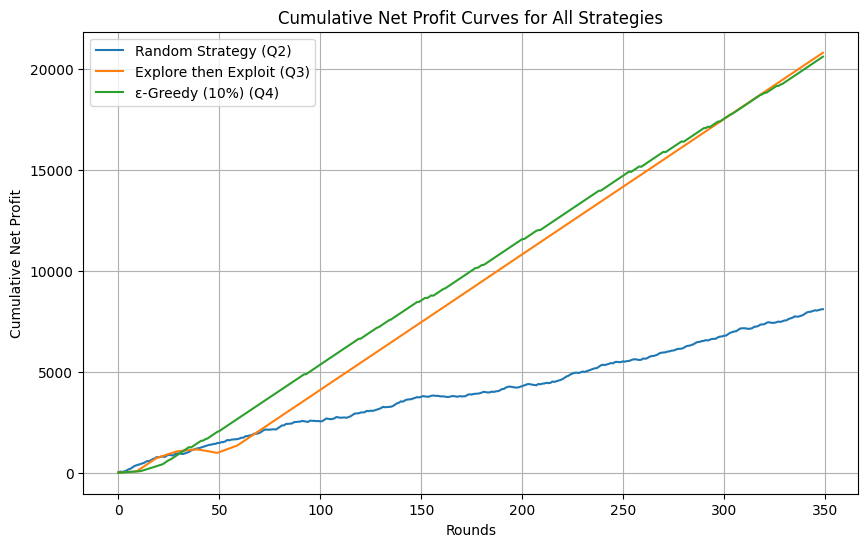

In [ ]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# Q6: Plot cumulative net profit curves
# (Using results from Q2–Q4, no re-simulation)
# --------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(
    random_cumulative_rewards,
    label="Random Strategy (Q2)"
)

plt.plot(
    explore_exploit_cumulative_rewards,
    label="Explore then Exploit (Q3)"
)

plt.plot(
    epsilon_greedy_cumulative_rewards,
    label="ε-Greedy (10%) (Q4)"
)

plt.xlabel("Rounds")
plt.ylabel("Cumulative Net Profit")
plt.title("Cumulative Net Profit Curves for All Strategies")
plt.legend()
plt.grid(True)

# Final plot only
plt.show()


**1) Which strategy produced the highest long-term cumulative profit, and why?**

    Answer : Explore-Then-Exploit (Q3) produced the highest long-term cumulative profit.

    Reason:
    After a short exploration phase, it consistently exploited
    the best-performing product, leading to a steeper and
    sustained profit growth compared to random selection and
    ε-greedy (10%), which continued exploring sub-optimal products.

**2) Which product consistently emerged as the most profitable choice?**

    Answer : Product 2

    Reason:
    Product 2 repeatedly delivered the highest rewards (~66–69
    units) and was selected most frequently across
    Explore-Then-Exploit and ε-Greedy strategies, dominating
    cumulative profit growth.

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
!jupyter nbconvert --to pdf "/content/MAB_Assignment_1_Code_Template.ipynb"


[NbConvertApp] Converting notebook /content/MAB_Assignment_1_Code_Template.ipynb to pdf
[NbConvertApp] Support files will be in MAB_Assignment_1_Code_Template_files/
[NbConvertApp] Making directory ./MAB_Assignment_1_Code_Template_files
[NbConvertApp] Writing 286083 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 235395 bytes to /content/MAB_Assignment_1_Code_Template.pdf
